#### AFML - GUDHI TDA library test

In [11]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import gudhi as gd

from AFML_functions import read_XYZ, cut_out, plot_facet_2d, plot_facet_3d
from AFML_functions import read_AFM_XYZ, mean_shift, down_shift, plot_afm_2d, plot_facet_3d, unique_z, interpolate_downsample

In [6]:
# Order terraces
def order_z(point_cloud):
    # Extract the Z-values and their unique sorted order
    z_values = np.array(point_cloud)[:, 3]
    sorted_order = np.argsort(z_values)
    
    # Create a mapping from original Z-values to their order
    z_to_order_mapping = {z: i + 1 for i, z in enumerate(np.unique(z_values))}
    
    # Update the first column based on the order
    ordered_indices = [z_to_order_mapping[z] for z in z_values]
    ordered_point_cloud = np.array(point_cloud)
    ordered_point_cloud[:, 0] = ordered_indices

    # Sort the data first by the index (first column), and then by the Z-value (last column)
    sorted_point_cloud = ordered_point_cloud[ordered_point_cloud[:, 0].argsort(), :]
    return sorted_point_cloud 


In [7]:
data = np.load('PAR_cut_xyz_test.npy')
print(data)

[[   1.     524.311 -156.427  516.217]
 [   1.     543.707 -205.471  516.217]
 [   1.     556.636 -177.27   516.217]
 ...
 [   4.     699.177 -285.365  505.679]
 [   4.     663.167 -290.072  509.83 ]
 [   4.     676.097 -290.072  509.83 ]]


In [8]:
z = set(point[3] for point in data)
print(z)

{512.067, 516.217, 518.454, 522.605, 524.842, 503.442, 505.679, 509.83}


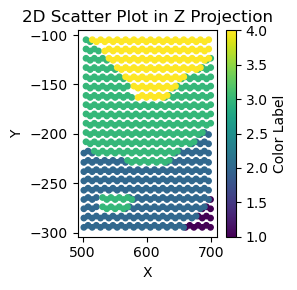

In [10]:
# Define the Z-values to be removed
z_remove = [516.217, 522.605, 503.442, 509.83]

# Create a mask to filter out points with the specified Z-values
mask = np.isin(data[:, 3], z_remove, invert=True)

# Apply the mask to keep points with Z-values not in the z_values_to_remove list
data_mod = data[mask]

data_mod = order_z(data_mod)
plot_facet_2d(data_mod)